In [2]:
import pandas as pd
import numpy as np
from itertools import combinations

# Load Data
data = pd.read_csv("..//data/featureddata/featured_daily.csv")

# Ensure 'Urban/Rural' is categorical
data['Urban/Rural'] = data['Urban/Rural'].astype('category')

# Compute mean AQI for urban and rural areas
urban_aqi = data[data['Urban/Rural'] == 1]['AQI'].mean()
rural_aqi = data[data['Urban/Rural'] == 0]['AQI'].mean()

# Pollution Disparity Index (PDI) Calculation
pdi = (urban_aqi - rural_aqi) / rural_aqi * 100

print(f"Urban AQI: {urban_aqi:.2f}, Rural AQI: {rural_aqi:.2f}")
print(f"Pollution Disparity Index (PDI): {pdi:.2f}%")

# Compute AQI disparity between different locations
location_aqi = data.groupby('Location')['AQI'].mean()
location_pdi = location_aqi.pct_change() * 100

print("\nLocation-wise AQI:")
print(location_aqi)
print("\nLocation-wise Pollution Disparity Index (PDI):")
print(location_pdi)

# Compute PDI between location pairs
location_pairs = list(combinations(location_aqi.index, 2))
location_pair_pdi = {}
for loc1, loc2 in location_pairs:
    loc1_aqi, loc2_aqi = location_aqi[loc1], location_aqi[loc2]
    pdi_pair = (loc1_aqi - loc2_aqi) / loc2_aqi * 100
    location_pair_pdi[(loc1, loc2)] = pdi_pair

print("\nPairwise Location PDI:")
for pair, pdi_value in location_pair_pdi.items():
    print(f"{pair[0]} vs {pair[1]}: {pdi_value:.2f}%")

Urban AQI: nan, Rural AQI: nan
Pollution Disparity Index (PDI): nan%

Location-wise AQI:
Location
Chennai       122.961022
Delhi         258.662487
Koonimedu     128.645024
Mawlynnong    122.058620
Name: AQI, dtype: float64

Location-wise Pollution Disparity Index (PDI):
Location
Chennai              NaN
Delhi         110.361368
Koonimedu     -50.265295
Mawlynnong     -5.119828
Name: AQI, dtype: float64

Pairwise Location PDI:
Chennai vs Delhi: -52.46%
Chennai vs Koonimedu: -4.42%
Chennai vs Mawlynnong: 0.74%
Delhi vs Koonimedu: 101.07%
Delhi vs Mawlynnong: 111.92%
Koonimedu vs Mawlynnong: 5.40%


Urban AQI: nan, Rural AQI: nan
Pollution Disparity Index (PDI): nan%


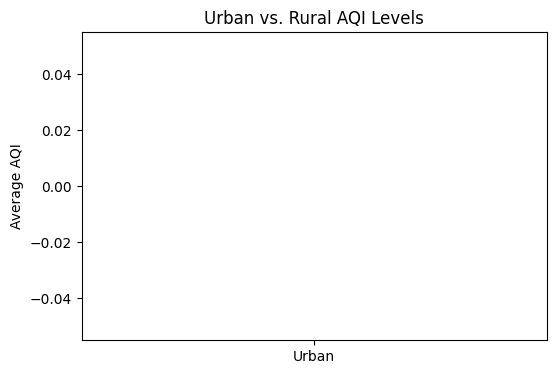


Location-wise AQI:
Location
Chennai       122.961022
Delhi         258.662487
Koonimedu     128.645024
Mawlynnong    122.058620
Name: AQI, dtype: float64

Location-wise Pollution Disparity Index (PDI):
Location
Chennai              NaN
Delhi         110.361368
Koonimedu     -50.265295
Mawlynnong     -5.119828
Name: AQI, dtype: float64


/tmp/ipykernel_85379/3642650015.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_aqi.index, y=location_aqi.values, palette="viridis")


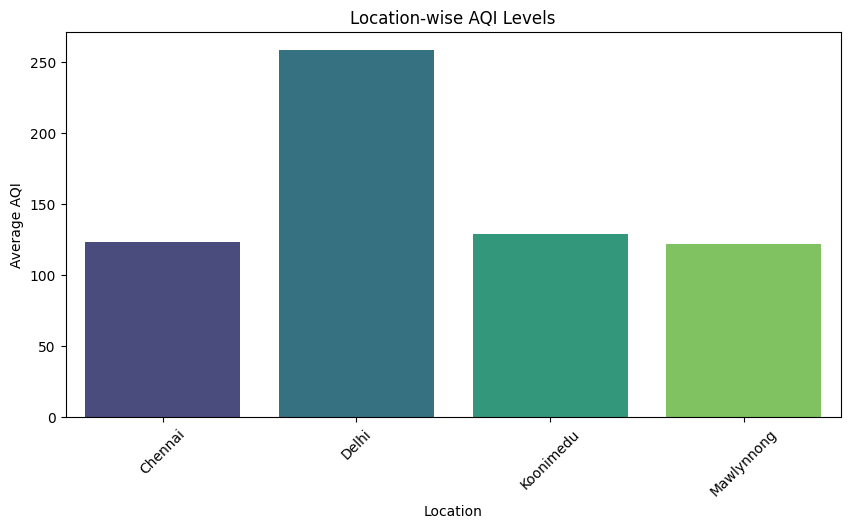

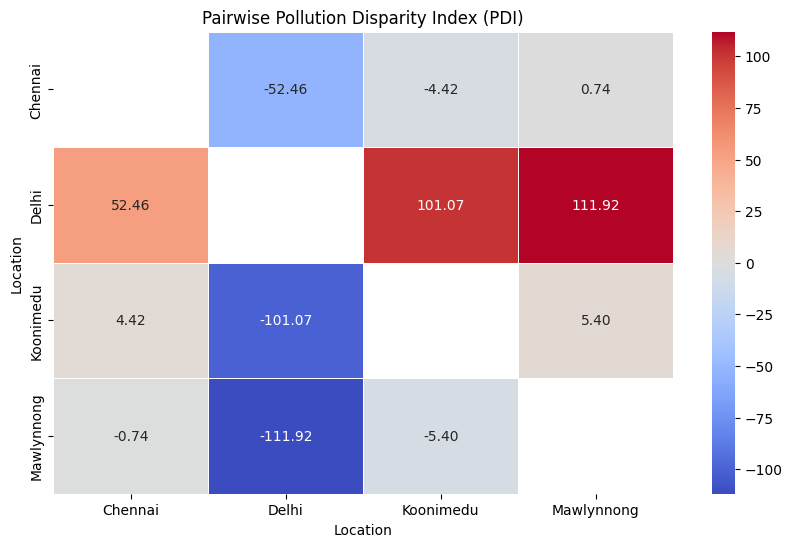

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Load Data
data = pd.read_csv("..//data/featureddata/featured_daily.csv")

# Ensure 'Urban/Rural' is categorical
data['Urban/Rural'] = data['Urban/Rural'].astype('category')

# Compute mean AQI for urban and rural areas
urban_aqi = data[data['Urban/Rural'] == 1]['AQI'].mean()
rural_aqi = data[data['Urban/Rural'] == 0]['AQI'].mean()

# Pollution Disparity Index (PDI) Calculation
pdi = (urban_aqi - rural_aqi) / rural_aqi * 100

print(f"Urban AQI: {urban_aqi:.2f}, Rural AQI: {rural_aqi:.2f}")
print(f"Pollution Disparity Index (PDI): {pdi:.2f}%")

# 📊 Plot Urban vs. Rural AQI
plt.figure(figsize=(6, 4))
plt.bar(["Urban", "Rural"], [urban_aqi, rural_aqi], color=["red", "green"])
plt.ylabel("Average AQI")
plt.title("Urban vs. Rural AQI Levels")
plt.show()

# Compute AQI disparity between different locations
location_aqi = data.groupby('Location')['AQI'].mean()
location_pdi = location_aqi.pct_change() * 100

print("\nLocation-wise AQI:")
print(location_aqi)
print("\nLocation-wise Pollution Disparity Index (PDI):")
print(location_pdi)

# 📊 Plot Location-wise AQI
plt.figure(figsize=(10, 5))
sns.barplot(x=location_aqi.index, y=location_aqi.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average AQI")
plt.title("Location-wise AQI Levels")
plt.show()

# Compute PDI between location pairs
location_pairs = list(combinations(location_aqi.index, 2))
location_pair_pdi = {}
for loc1, loc2 in location_pairs:
    loc1_aqi, loc2_aqi = location_aqi[loc1], location_aqi[loc2]
    pdi_pair = (loc1_aqi - loc2_aqi) / loc2_aqi * 100
    location_pair_pdi[(loc1, loc2)] = pdi_pair

# Convert pairwise PDI to a DataFrame for heatmap
pairwise_pdi_df = pd.DataFrame(index=location_aqi.index, columns=location_aqi.index)
for (loc1, loc2), value in location_pair_pdi.items():
    pairwise_pdi_df.loc[loc1, loc2] = value
    pairwise_pdi_df.loc[loc2, loc1] = -value  # Symmetric values

pairwise_pdi_df = pairwise_pdi_df.astype(float)

# 📊 Plot Heatmap for Pairwise PDI
plt.figure(figsize=(10, 6))
sns.heatmap(pairwise_pdi_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pairwise Pollution Disparity Index (PDI)")
plt.show()


Urban AQI: nan, Rural AQI: nan
Pollution Disparity Index (PDI): nan%

Location-wise AQI:
Location
Chennai       122.961022
Delhi         258.662487
Koonimedu     128.645024
Mawlynnong    122.058620
Name: AQI, dtype: float64

Location-wise Pollution Disparity Index (PDI):
Location
Chennai              NaN
Delhi         110.361368
Koonimedu     -50.265295
Mawlynnong     -5.119828
Name: AQI, dtype: float64

Pairwise Location PDI:
Chennai vs Delhi: -52.46%
Chennai vs Koonimedu: -4.42%
Chennai vs Mawlynnong: 0.74%
Delhi vs Koonimedu: 101.07%
Delhi vs Mawlynnong: 111.92%
Koonimedu vs Mawlynnong: 5.40%


/tmp/ipykernel_85379/470586882.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_aqi.index, y=location_aqi.values, palette='viridis')


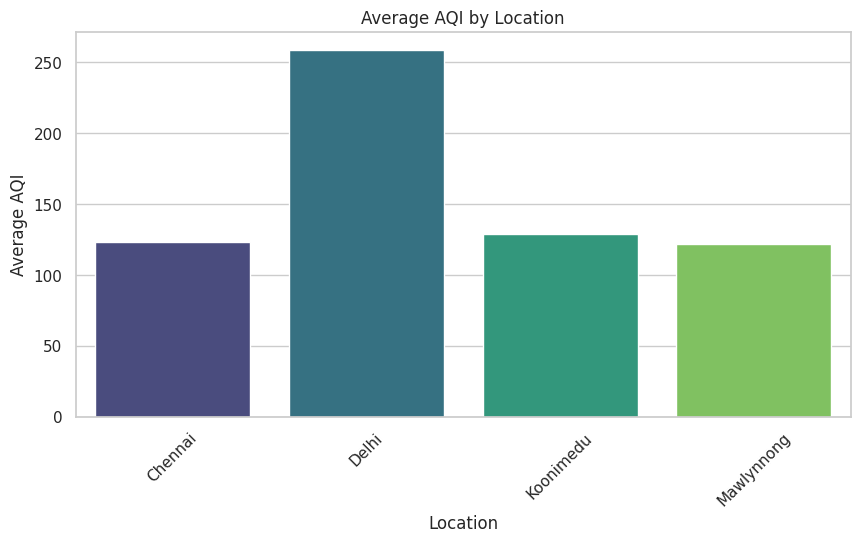

/tmp/ipykernel_85379/470586882.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_avg.index, y=pollutant_avg.values, ax=ax, palette='coolwarm')
/tmp/ipykernel_85379/470586882.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_avg.index, y=pollutant_avg.values, ax=ax, palette='coolwarm')
/tmp/ipykernel_85379/470586882.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_avg.index, y=pollutant_avg.values, ax=ax, palette='coolwarm')
/tmp/ipykernel_85379/470586882.py:61: FutureWarning: 

Passing `palette` 

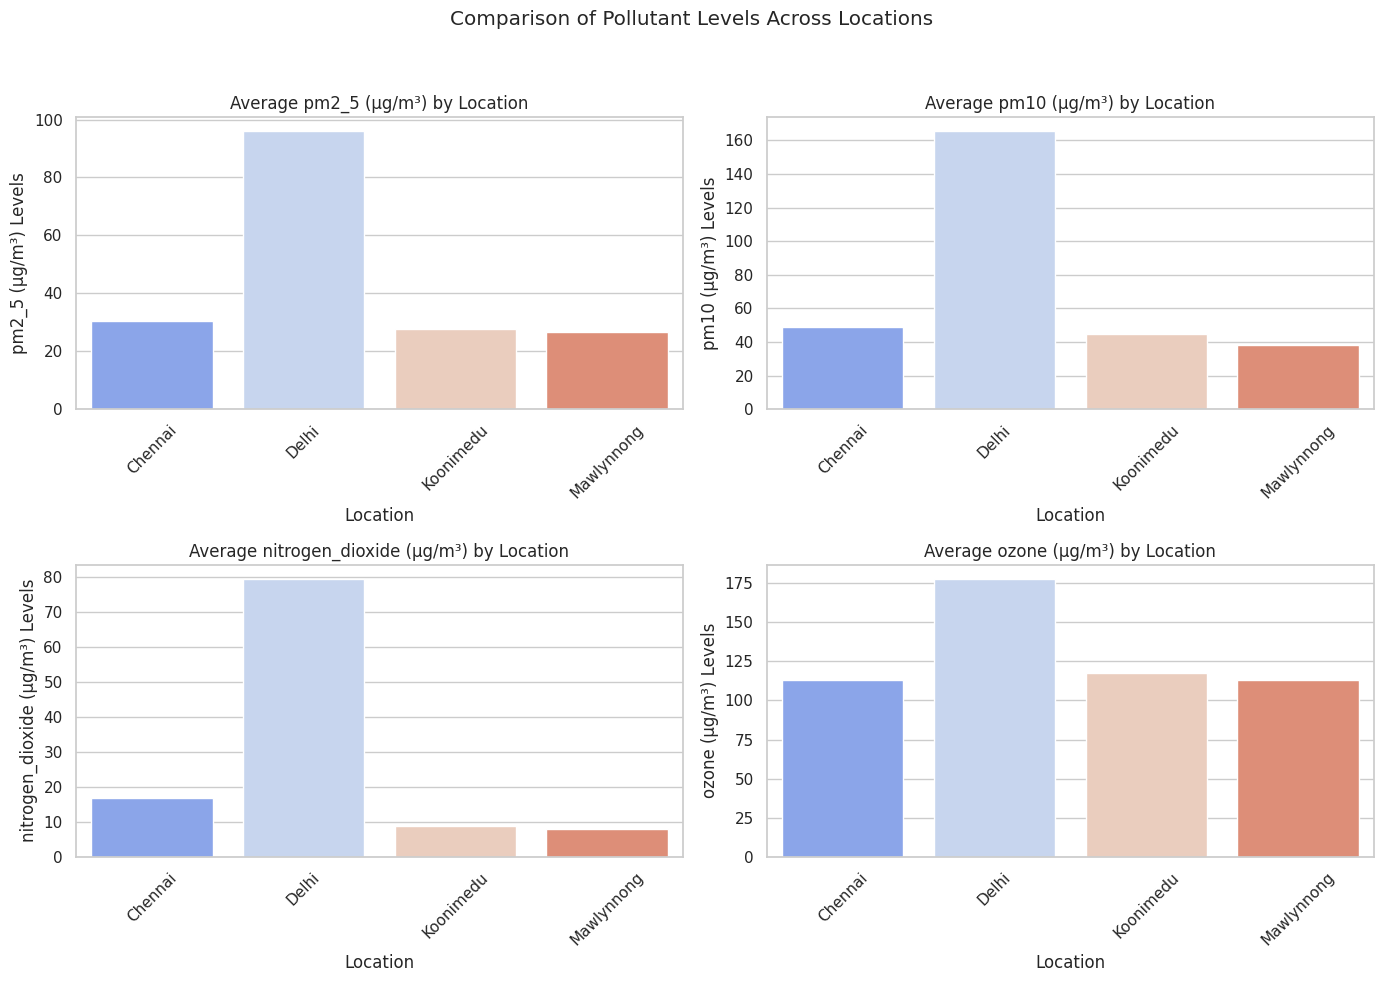

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Load Data
data = pd.read_csv("..//data/featureddata/featured_daily.csv")

# Ensure 'Urban/Rural' is categorical
data['Urban/Rural'] = data['Urban/Rural'].astype('category')

# Compute mean AQI for urban and rural areas
urban_aqi = data[data['Urban/Rural'] == 1]['AQI'].mean()
rural_aqi = data[data['Urban/Rural'] == 0]['AQI'].mean()

# Pollution Disparity Index (PDI) Calculation
pdi = (urban_aqi - rural_aqi) / rural_aqi * 100

print(f"Urban AQI: {urban_aqi:.2f}, Rural AQI: {rural_aqi:.2f}")
print(f"Pollution Disparity Index (PDI): {pdi:.2f}%")

# Compute AQI disparity between different locations
location_aqi = data.groupby('Location')['AQI'].mean()
location_pdi = location_aqi.pct_change() * 100

print("\nLocation-wise AQI:")
print(location_aqi)
print("\nLocation-wise Pollution Disparity Index (PDI):")
print(location_pdi)

# Compute PDI between location pairs
location_pairs = list(combinations(location_aqi.index, 2))
location_pair_pdi = {}
for loc1, loc2 in location_pairs:
    loc1_aqi, loc2_aqi = location_aqi[loc1], location_aqi[loc2]
    pdi_pair = (loc1_aqi - loc2_aqi) / loc2_aqi * 100
    location_pair_pdi[(loc1, loc2)] = pdi_pair

print("\nPairwise Location PDI:")
for pair, pdi_value in location_pair_pdi.items():
    print(f"{pair[0]} vs {pair[1]}: {pdi_value:.2f}%")

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=location_aqi.index, y=location_aqi.values, palette='viridis')
plt.xlabel("Location")
plt.ylabel("Average AQI")
plt.title("Average AQI by Location")
plt.xticks(rotation=45)
plt.show()

# Compare pollutant levels across locations
pollutants = ['pm2_5 (μg/m³)', 'pm10 (μg/m³)', 'nitrogen_dioxide (μg/m³)', 'ozone (μg/m³)']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Comparison of Pollutant Levels Across Locations")

for i, pollutant in enumerate(pollutants):
    ax = axes[i // 2, i % 2]
    pollutant_avg = data.groupby('Location')[pollutant].mean()
    sns.barplot(x=pollutant_avg.index, y=pollutant_avg.values, ax=ax, palette='coolwarm')
    ax.set_title(f"Average {pollutant} by Location")
    ax.set_xlabel("Location")
    ax.set_ylabel(f"{pollutant} Levels")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
